In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
atom = pn.Atom('O', 3, NLevels=5)

In [3]:
# Let's generate an array of densities
dens = np.logspace(1, 8, 100)

In [4]:
# Let's get the population of the levels at a given Te, for these densities
Te = 1e4
pops = atom.getPopulations(Te, dens)
# Let's get the level crtical densities
crit_dens = atom.getCritDensity(Te)

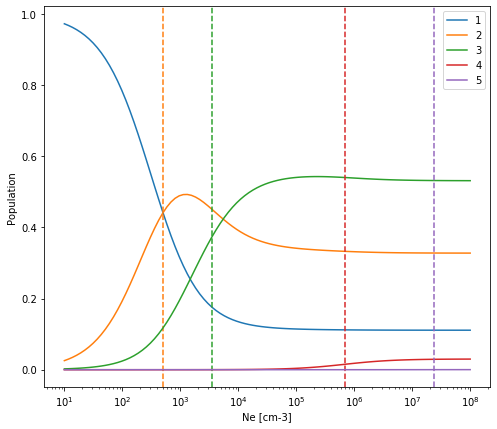

In [5]:
# Plot the evolution of the populations while the density increases
# The vertical lines indicate the critical densities of the different levels
f, ax = plt.subplots(figsize=(8,7))
i = 1
for pop, crit_den in zip(pops, crit_dens): 
    pl1 = ax.plot(dens, pop, label=i)
    ax.axvline(crit_den, c=pl1[0].get_color(), ls='--')
    i += 1
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Ne [cm-3]')
ax.set_ylabel('Population');

We can see that the LTE is obtained when the density is quite high (i.e. when the level populations are stabilized, above 1e7 cm-3).

The final populations also depend on the Te. In the case of Te=1e5, the density to reach the plateau is higher:

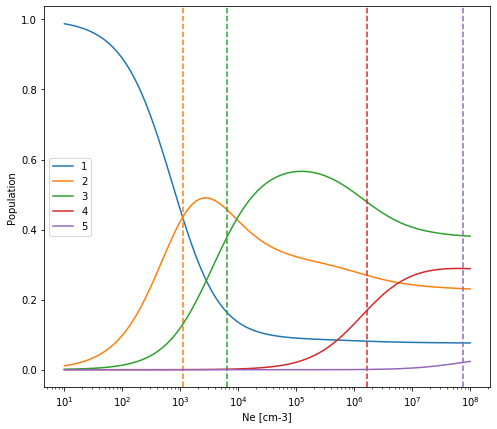

In [6]:
# Let's get the population of the levels at a given Te, for these densities
Te = 1e5
pops = atom.getPopulations(Te, dens)
# Let's get the level crtical densities
crit_dens = atom.getCritDensity(Te)# Plot the evolution of the populations while the density increases
# The vertical lines indicate the critical densities of the different levels
f, ax = plt.subplots(figsize=(8,7))
i = 1
for pop, crit_den in zip(pops, crit_dens): 
    pl1 = ax.plot(dens, pop, label=i)
    ax.axvline(crit_den, c=pl1[0].get_color(), ls='--')
    i += 1
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Ne [cm-3]')
ax.set_ylabel('Population');

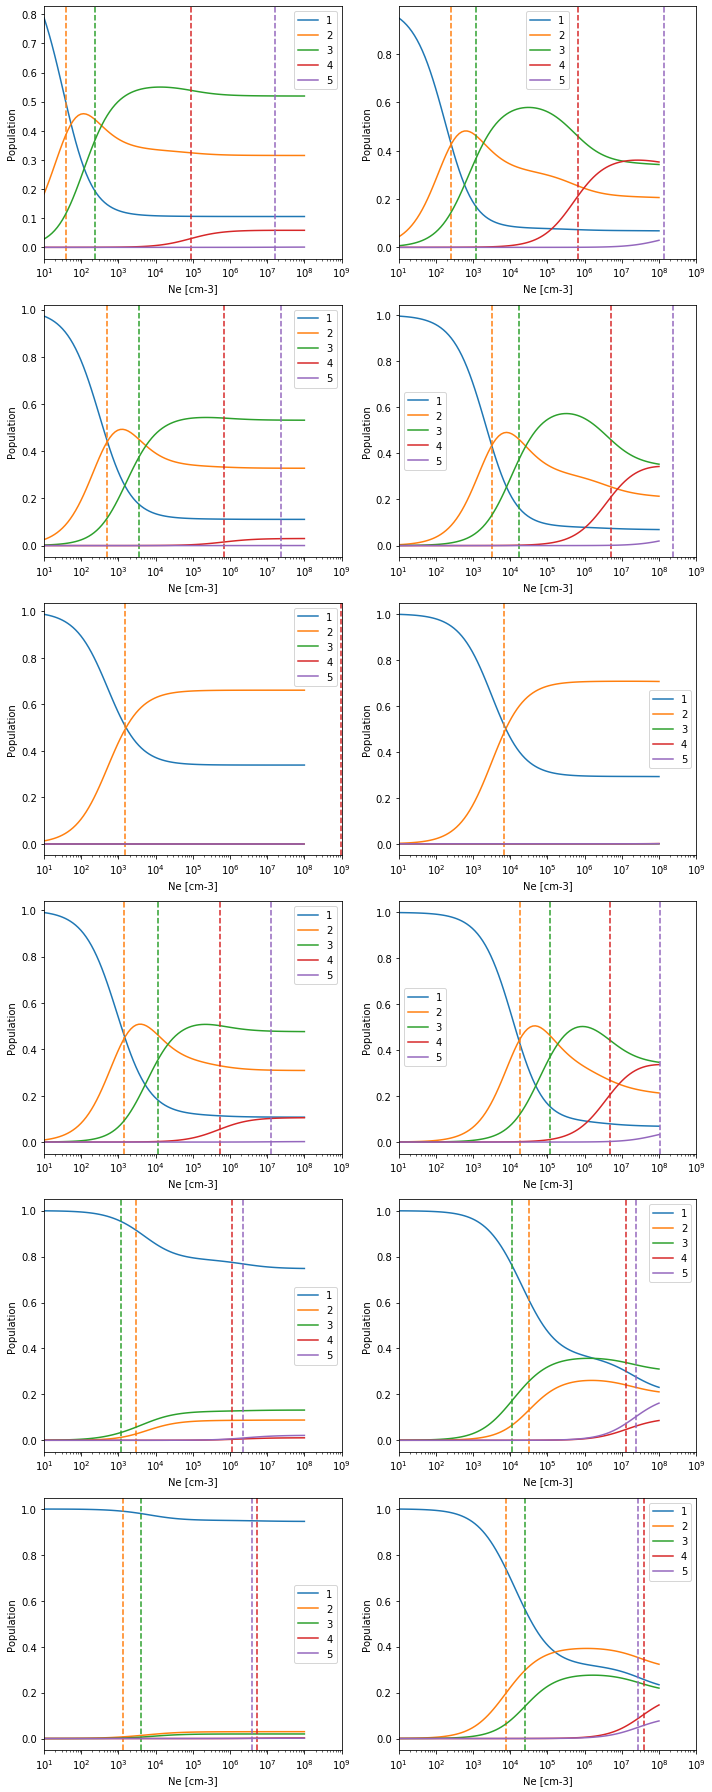

In [14]:
atoms = [pn.Atom('N', 2, NLevels=5),
         pn.Atom('O', 3, NLevels=5),
         pn.Atom('N', 3, NLevels=5),
         pn.Atom('S', 3, NLevels=5),
         pn.Atom('S', 2, NLevels=5),
         pn.Atom('O', 2, NLevels=5)]
f, axes = plt.subplots(6, 2, figsize=(10, 25))
i_ax = 0
for atom in atoms:
    for Te in (1e4, 1e6):
        ax = axes.ravel()[i_ax]
        pops = atom.getPopulations(Te, dens)
        # Let's get the level crtical densities
        crit_dens = atom.getCritDensity(Te)# Plot the evolution of the populations while the density increases
        # The vertical lines indicate the critical densities of the different levels
        i = 1
        for pop, crit_den in zip(pops, crit_dens): 
            pl1 = ax.plot(dens, pop, label=i)
            ax.axvline(crit_den, c=pl1[0].get_color(), ls='--')
            i += 1
        ax.set_xscale('log')
        ax.legend()
        ax.set_xlabel('Ne [cm-3]')
        ax.set_ylabel('Population')
        i_ax += 1
        ax.set_xlim(1e1, 1e9)
f.tight_layout()